In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import napari
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


plt.rcParams["font.family"] = ""

In [22]:
def max_z_track_visualisation(track_of_interest,raw_image,main_tracking_df):
    
    
    current_track = main_tracking_df[main_tracking_df['track_id'] == track_of_interest]
    #A black image with all pixels set to zero
    empty_layer = np.zeros_like(raw_image_3)

    # Loop through tracks and set values in the volume
    for index, track in current_track.iterrows():
        frame, mu_z, mu_y, mu_x = int(track['frame']), track['mu_z'], track['mu_y'], track['mu_x']
        #sigma_z, sigma_y, sigma_x = track['sigma_z'], track['sigma_y'], track['sigma_x']
        sigma_z = 4
        sigma_y = 2
        sigma_x = 2

        # Define the bounding box based on center and sigma
        z_start, z_end = int(mu_z - 3 * sigma_z), int(mu_z + 3 * sigma_z)
        y_start, y_end = int(mu_y - 3 * sigma_y), int(mu_y + 3 * sigma_y)
        x_start, x_end = int(mu_x - 3 * sigma_x), int(mu_x + 3 * sigma_x)

        # Clip the coordinates to be within the image bounds
        z_start = max(0, z_start)
        y_start = max(0, y_start)
        x_start = max(0, x_start)
        z_end = min(raw_image.shape[1], z_end)
        y_end = min(raw_image.shape[2], y_end)
        x_end = min(raw_image.shape[3], x_end)

        # Extract the region from the raw image data
        #print(frame,z_start,z_end, y_start,y_end, x_start,x_end)
        #region_data = raw_image_3[frame, z_start:z_end, y_start:y_end, x_start:x_end]

        # Set everything outside the region to zero
        # Set the region inside the bounding box to the corresponding values in raw_image_data
        empty_layer[frame, z_start:z_end, y_start:y_end, x_start:x_end] = raw_image[frame, z_start:z_end, y_start:y_end, x_start:x_end]
        

    # Assuming 'your_4d_array' is the numpy array with dimensions (Time, z, y, x)

    # Get the shape of the array
    time_points, z_values, y_values, x_values = empty_layer.shape

    # Create an empty 3D array to store the result
    result_array = np.zeros((time_points, y_values, x_values))

    # Loop through each time point
    for t in range(time_points):
        # Calculate the sum along the z-axis
        z_sum = np.sum(empty_layer[t, :, :, :], axis=(1, 2))

        # Find the index of the maximum sum
        max_sum_index = np.argmax(z_sum)

        # Select the slice with the maximum sum
        result_array[t, :, :] = empty_layer[t, max_sum_index, :, :]
        
    
    return result_array

    # Now, 'result_array' contains the 3D array with the maximum sum along the z-axis for each time point


In [3]:
def max_intensity_projection_track_visualisation(track_of_interest,raw_image,main_tracking_df):
    
    
    current_track = main_tracking_df[main_tracking_df['track_id'] == track_of_interest]
    #A black image with all pixels set to zero
    empty_layer = np.zeros_like(raw_image)

    # Loop through tracks and set values in the volume
    for index, track in current_track.iterrows():
        frame, mu_z, mu_y, mu_x = int(track['frame']), track['mu_z'], track['mu_y'], track['mu_x']
        #sigma_z, sigma_y, sigma_x = track['sigma_z'], track['sigma_y'], track['sigma_x']
        sigma_z = 4
        sigma_y = 2
        sigma_x = 2

        # Define the bounding box based on center and sigma
        z_start, z_end = int(mu_z - 3 * sigma_z), int(mu_z + 3 * sigma_z)
        y_start, y_end = int(mu_y - 3 * sigma_y), int(mu_y + 3 * sigma_y)
        x_start, x_end = int(mu_x - 3 * sigma_x), int(mu_x + 3 * sigma_x)

        # Clip the coordinates to be within the image bounds
        z_start = max(0, z_start)
        y_start = max(0, y_start)
        x_start = max(0, x_start)
        z_end = min(raw_image.shape[1], z_end)
        y_end = min(raw_image.shape[2], y_end)
        x_end = min(raw_image.shape[3], x_end)

        # Extract the region from the raw image data
        #print(frame,z_start,z_end, y_start,y_end, x_start,x_end)
        #region_data = raw_image_3[frame, z_start:z_end, y_start:y_end, x_start:x_end]

        # Set everything outside the region to zero
        # Set the region inside the bounding box to the corresponding values in raw_image_data
        empty_layer[frame, z_start:z_end, y_start:y_end, x_start:x_end] = raw_image[frame, z_start:z_end, y_start:y_end, x_start:x_end]
        

    # Assuming 'your_4d_array' is the numpy array with dimensions (Time, z, y, x)

    # Get the shape of the array
    time_points, z_values, y_values, x_values = empty_layer.shape
    
    # Create an empty array to store the maximum intensity projections in each time 
    
    mip_movie = []
    # Loop through each time point
    for t in range(time_points):
        max_slice = np.max(empty_layer[t],axis=0)
        mip_movie.append(max_slice)
    
    mip_movie = np.array(mip_movie)
    return mip_movie


In [4]:
def total_sum_track_visualisation(track_of_interest,raw_image,main_tracking_df):
    
    
    current_track = main_tracking_df[main_tracking_df['track_id'] == track_of_interest]
    #A black image with all pixels set to zero
    empty_layer = np.zeros_like(raw_image_3)

    # Loop through tracks and set values in the volume
    for index, track in current_track.iterrows():
        frame, mu_z, mu_y, mu_x = int(track['frame']), track['mu_z'], track['mu_y'], track['mu_x']
        #sigma_z, sigma_y, sigma_x = track['sigma_z'], track['sigma_y'], track['sigma_x']
        sigma_z = 4
        sigma_y = 2
        sigma_x = 2

        # Define the bounding box based on center and sigma
        z_start, z_end = int(mu_z - 3 * sigma_z), int(mu_z + 3 * sigma_z)
        y_start, y_end = int(mu_y - 3 * sigma_y), int(mu_y + 3 * sigma_y)
        x_start, x_end = int(mu_x - 3 * sigma_x), int(mu_x + 3 * sigma_x)

        # Clip the coordinates to be within the image bounds
        z_start = max(0, z_start)
        y_start = max(0, y_start)
        x_start = max(0, x_start)
        z_end = min(raw_image.shape[1], z_end)
        y_end = min(raw_image.shape[2], y_end)
        x_end = min(raw_image.shape[3], x_end)

        # Extract the region from the raw image data
        #print(frame,z_start,z_end, y_start,y_end, x_start,x_end)
        #region_data = raw_image_3[frame, z_start:z_end, y_start:y_end, x_start:x_end]

        # Set everything outside the region to zero
        # Set the region inside the bounding box to the corresponding values in raw_image_data
        empty_layer[frame, z_start:z_end, y_start:y_end, x_start:x_end] = raw_image[frame, z_start:z_end, y_start:y_end, x_start:x_end]
        

    # Assuming 'your_4d_array' is the numpy array with dimensions (Time, z, y, x)

    # Get the shape of the array
    time_points, z_values, y_values, x_values = empty_layer.shape
    
    # Create an empty array to store the maximum intensity projections in each time 
    
    total_sum_movie = []
    # Loop through each time point
    for t in range(time_points):
        z_sum = np.sum(empty_layer[t],axis=0)
        total_sum_movie.append(z_sum)
    
    total_sum_movie = np.array(total_sum_movie)
    return total_sum_movie


In [5]:
def crop_movie(image):
    image_array = []
    # Iterate through each frame in the time series
    for i in range(image.shape[0]):
        # Get non-zero indices in the current frame
        non_zero_indices = np.nonzero(image[i, :, :])
        if len(non_zero_indices[1]) > 0:
            image_array.append(image[i,min(non_zero_indices[0]):max(non_zero_indices[0])+1,
                                             min(non_zero_indices[1]):max(non_zero_indices[1])+1])
    return image_array

In [6]:
def plot_raw_movie_v1(track_array):
    # Assuming 'images_list' is a list containing NumPy arrays representing images
    # Each NumPy array is assumed to be a 2D array (e.g., 30x30)

    # Set the number of rows and columns for subplots
    num_rows = 5
    num_cols = 7

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Loop through the images and display them in subplots
    for i in range(min(len(ans), num_rows * num_cols)):
        axes[i].imshow(ans[i])  # Adjust cmap if needed
        axes[i].axis('off')  # Turn off axis labels

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


In [7]:
def plot_raw_movie(track_array):
    
    length_of_track = len(track_array)
    # Set the number of rows and columns for subplots
    num_cols = 7
    num_rows = length_of_track // num_cols + 1

    fig = make_subplots(rows=num_rows, cols=7)

    r = 1
    c = 1
    for i in range(len(track_array)):
        image = px.imshow(track_array[i], range_color = [0,200])
        fig.add_trace(image.data[0], row = r, col = c)
        if i != 0 and (i+1) % (num_cols) == 0: 
            r = r + 1
            c = 1
        else: 
            c = c + 1

    return fig

In [8]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/filtered_tracks.pkl')
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path_3 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'
# Load the TIFF file using skimage
raw_image_3 = io.imread(file_path_3)
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path_2 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel2_complete.tif'
# Load the TIFF file using skimage
raw_image_2 = io.imread(file_path_2)

In [9]:
filtered_tracks[15:20]

,track_id,c2_peak,c3_peak,track_length,start_frame,end_frame,peak_frame_c2,peak_start_c2,peak_frame_c3,peak_start_c3
185,364,227.0,325.145821,25,0,24,22,22,7,7
216,415,195.0,289.600996,27,0,26,23,23,20,20
254,516,189.0,286.000000,21,1,21,6,5,19,18
255,519,195.0,340.213324,37,1,37,7,6,5,4
266,541,211.0,321.000000,22,1,22,9,8,9,8


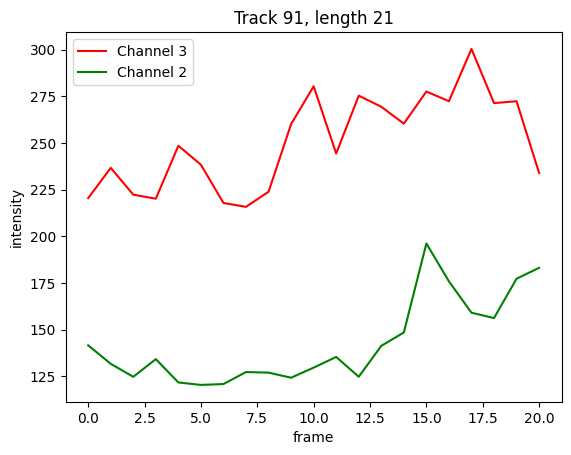

In [10]:
current_track = track_df[track_df['track_id'] == 91]
plt.title(f'Track 91, length {len(current_track)}')
plt.plot(current_track['frame'],current_track['amplitude'], color ='red', label = 'Channel 3')
plt.plot(current_track['frame'], current_track['c2_amp'], color = 'green', label = 'Channel 2')
plt.xlabel('frame')
plt.ylabel('intensity')
plt.legend()

In [11]:
track_df.head()

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,...,track_id,c2_amp,c2_peak,c2_peak_x,c2_peak_y,c2_peak_z,c3_mean_amp,c2_peak_mean,c2_voxel_sum,c3_voxel_sum
0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,...,0,122.947826,152.0,9.0,14.0,2.0,163.682353,125.500000,11295,13913
1,0,1,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,...,1,116.233333,143.0,34.0,87.0,2.0,138.233333,114.826667,20068,19928
2,0,2,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0,...,2,122.330000,142.0,41.0,142.0,0.0,153.940000,122.853333,15316,22805
3,0,3,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0,...,3,117.626667,142.0,42.0,59.0,0.0,141.280000,118.016667,14557,20358
4,0,4,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0,...,4,115.112000,141.0,45.0,74.0,3.0,147.768000,115.502857,23194,21963


In [25]:
def plot_raw_movie(plot_type, track_number = 36, raw_image = raw_image_3, main_tracking_df = track_df):
    
    
    if plot_type == 'max_intensity_projection':      
        result_array = max_intensity_projection_track_visualisation(track_number,raw_image,main_tracking_df)
        track_array = crop_movie(result_array)
    elif plot_type == 'max_z_slice':      
        result_array = max_z_track_visualisation(track_number,raw_image,main_tracking_df)
        track_array = crop_movie(result_array)
    elif plot_type == 'total_z_sum':      
        result_array = total_sum_track_visualisation(track_number,raw_image,main_tracking_df)
        track_array = crop_movie(result_array)
    
    length_of_track = len(track_array)
    # Set the number of rows and columns for subplots
    num_cols = 7
    num_rows = length_of_track // num_cols + 1

    fig = make_subplots(rows=num_rows, cols=7)

    r = 1
    c = 1
    for i in range(len(track_array)):
        image = px.imshow(track_array[i])
        fig.add_trace(image.data[0], row = r, col = c)
        if i != 0 and (i+1) % (num_cols) == 0: 
            r = r + 1
            c = 1
        else: 
            c = c + 1
    r = 1 
    c = 1

    return fig

In [30]:
plot_raw_movie(plot_type = 'max_intensity_projection', raw_image = raw_image_3,track_number = 36)

In [31]:
plot_raw_movie(plot_type = 'max_intensity_projection', raw_image = raw_image_2,track_number = 36)

In [92]:
import plotly.graph_objects as go
current_track = track_df[track_df['track_id'] == 516]
# Create Line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=current_track['frame'], y=current_track['amplitude'], name = 'Channel 3',
             line = dict(color = 'red', width = 4)))
fig.add_trace(go.Scatter(x=current_track['frame'], y=current_track['c2_amp'],name = 'Channel 2', 
                        line=dict(color='green', width = 4)))

# Edit the layout
fig.update_layout(title='Intensity Over Time', title_x = 0.5,
                   xaxis_title='Frames',  xaxis_color = 'black', title_font = dict(color = 'black', size = 30),
                   yaxis_title='Amplitude', yaxis_color = 'black', legend=dict(bgcolor=None),autosize = True, plot_bgcolor = None,
                 paper_bgcolor = None)


fig.show()

In [93]:
def plot_intensity_over_time(track_of_interest, main_tracking_df):
    current_track_df = main_tracking_df[main_tracking_df['track_id'] == track_of_interest]
    # Create Line plot
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=current_track_df['frame'], y=current_track_df['amplitude'], name = 'Channel 3',
                 line = dict(color = 'red', width = 4)))
    fig.add_trace(go.Scatter(x=current_track_df['frame'], y=current_track_df['c2_amp'],name = 'Channel 2', 
                            line=dict(color='green', width = 4)))

    # Edit the layout
    fig.update_layout(title='Intensity Over Time', title_x = 0.5,
                       xaxis_title='Frames',  xaxis_color = 'black', title_font = dict(color = 'black', size = 30),
                       yaxis_title='Amplitude', yaxis_color = 'black', legend=dict(bgcolor=None),autosize = True, plot_bgcolor = None,
                     paper_bgcolor = None)


    return fig 

In [94]:
plot_intensity_over_time(91,track_df)

In [96]:
from dash import Dash, html, dcc, callback 
>>> help(dash.html.Label)

NameError: name 'dash' is not defined